# Neural Networks for Handwritten Digit Recognition, Binary

Use a neural network to recognize the hand-written digits zero and one.


# Outline
- [ 1 - Packages ](#1)
- [ 2 - Neural Networks](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2 Dataset](#2.2)
  - [ 2.3 Model representation](#2.3)
  - [ 2.4 Tensorflow Model Implementation](#2.4)
    - [ Sequential Model](#seq_model)
  - [ 2.5 NumPy Model Implementation (Forward Prop in NumPy)](#2.5)
    - [ Sequential Model Using Numpy](#numpy_seq_model)
  - [ 2.6 Vectorized NumPy Model Implementation](#2.6)
    - [ Vectorized Implementation](#vectorized_seq_model)
  - [ 2.7 NumPy Broadcasting](#2.7)


<a name="1"></a>
## 1 - Packages 

- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

2022-12-09 03:48:23.116376: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Tensorflow and Keras**  
Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow. This course will be using the Keras interface. 

<a name="2"></a>
## 2 - Neural Networks

Compared to logistic regression models, which can be extended to handle non-linear boundaries using polynomial regression. For even more complex scenarios such as image recognition, neural networks are preferred.

<a name="2.1"></a>
### 2.1 Problem Statement

In this exercise, we will use a neural network to recognize two handwritten digits, zero and one. This is a binary classification task. Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks.

<a name="2.2"></a>
### 2.2 Dataset

- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 1000 training examples of handwritten digits $^1$, here limited to zero and one.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training example becomes a single row in our data matrix `X`. 
        - This gives us a 1000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 1000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 1` if the image is of the digit `1`.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [2]:
# load dataset
X, y = load_data()

<a name="toc_89367_2.2.1"></a>
#### 2.2.1 View the variables

Print elements of the variables `X` and `y`.  

In [3]:
print ('The first element of X is: ', X[0])

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [4]:
print ('The first element of y is: ', y[0, 0])
print ('The last element of y is: ', y[-1, 0])

The first element of y is:  0
The last element of y is:  1


<a name="toc_89367_2.2.2"></a>
#### 2.2.2 Check the dimensions of the variables

In [5]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


<a name="toc_89367_2.2.3"></a>
#### 2.2.3 Visualizing the Data

- Below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image.

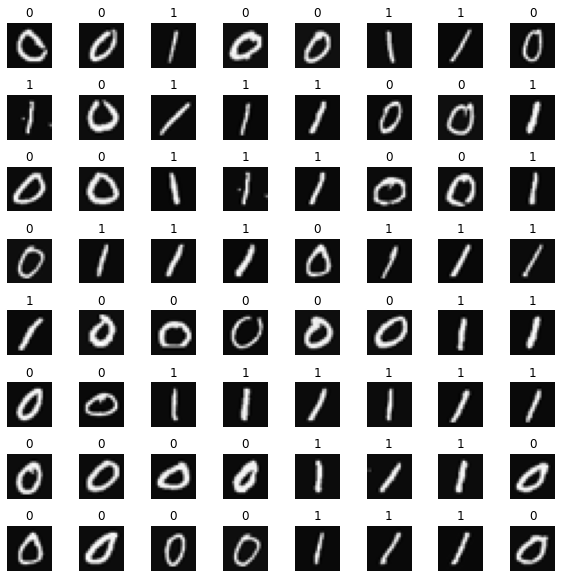

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

<a name="2.3"></a>
### 2.3 Model representation

The neural network is shown below:

- This has three dense layers with sigmoid activations.
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<center> <img src="images/C2_W1_Assign1.PNG" width="500" height="350"> </center>

- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $1$ output unit in layer 3. 

    - Recall that the dimensions of these parameters are determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then for that layer 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W` and `b` for our data are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 1) and the shape of `b3` is: (1,)
  
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (1,n) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention. 
               

<a name="2.4"></a>
### 2.4 Tensorflow Model Implementation


Tensorflow models are built layer by layer. A layer's input dimensions $s_{in}$ are calculated above. We specify a layer's *output dimensions* and this determines the next layer's input dimension. The input dimension of the first layer is derived from the size of the training data specified in the `model.fit` statement below. 

>**Note:** It is also possible to add an input layer that specifies the input dimension of the first layer. For example:  
`tf.keras.Input(shape=(400,)),    # Specify input shape`  

<a name="seq_model"></a>
### Sequential Model

Below, using Keras [Sequential model](https://keras.io/guides/sequential_model/) and [Dense Layer](https://keras.io/api/layers/core_layers/dense/) with a sigmoid activation to construct the network described above.

In [7]:
model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    # Specify input size
        tf.keras.layers.Dense(units=25, activation="sigmoid", use_bias=True, name='layer_1'),
        tf.keras.layers.Dense(units=15, activation="sigmoid", use_bias=True, name='layer_2'),
        tf.keras.layers.Dense(units=1, activation="sigmoid", use_bias=True, name='output_layer')
    ], name = "my_model" 
)                            


2022-12-09 03:54:42.855030: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 25)                10025     
                                                                 
 layer_2 (Dense)             (None, 15)                390       
                                                                 
 output_layer (Dense)        (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


The parameter counts shown in the summary correspond to the number of elements in the weight and bias arrays as shown below.

In [10]:
L1_num_params = (400 * 25) + 25  # W1 parameters  + b1 parameters
L2_num_params = (25 * 15) + 15   # W2 parameters  + b2 parameters
L3_num_params = (15 * 1) + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

L1 params =  10025 , L2 params =  390 ,  L3 params =  16


Let's further examine the weights to verify that tensorflow produced the same dimensions as we calculated above.

In [11]:
type(model.layers)

list

In [12]:
[layer1, layer2, layer3] = model.layers

In [13]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


The method `xx.get_weights` returns a NumPy array. One can also access the weights directly in their tensor form. Note the shape of the tensors in the final layer.

In [18]:
print(model.layers[0].weights)

[<tf.Variable 'layer_1/kernel:0' shape=(400, 25) dtype=float32, numpy=
array([[ 0.07241318,  0.04761896,  0.10300337, ..., -0.0964076 ,
         0.08197807, -0.02551359],
       [-0.11735641, -0.09301191, -0.0086634 , ..., -0.05598056,
         0.07492149, -0.03470214],
       [ 0.05716479, -0.03852791,  0.11602738, ..., -0.05027979,
         0.03651895, -0.09898514],
       ...,
       [-0.04382874, -0.0196448 , -0.09215184, ..., -0.11592815,
        -0.05234659,  0.00817746],
       [-0.01237108,  0.00443911, -0.07460341, ..., -0.03587797,
        -0.02791844, -0.05779963],
       [ 0.1080831 , -0.04347846,  0.11501601, ..., -0.01877042,
        -0.06834211, -0.03368235]], dtype=float32)>, <tf.Variable 'layer_1/bias:0' shape=(25,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]


In [17]:
print(model.layers[1].weights)

[<tf.Variable 'layer_2/kernel:0' shape=(25, 15) dtype=float32, numpy=
array([[-0.3456863 , -0.26671904,  0.31952155,  0.11723077, -0.00470468,
        -0.262301  ,  0.05659086, -0.3775116 , -0.16190465,  0.29183316,
        -0.03851122,  0.22366232,  0.38155317, -0.05834845, -0.10119602],
       [-0.29577902, -0.07654858, -0.36806402,  0.14873987, -0.20076594,
         0.1696158 , -0.18985792, -0.18375412, -0.1822116 , -0.03834438,
        -0.29850975,  0.10559884, -0.14957184, -0.21994117,  0.07043758],
       [-0.21486779, -0.0456399 , -0.36865368, -0.03009471, -0.1986099 ,
        -0.17208318, -0.2991225 , -0.3104782 ,  0.02633402,  0.0590964 ,
         0.06519151,  0.2747907 , -0.25360036,  0.09040618, -0.12731618],
       [ 0.0113818 , -0.20126669, -0.36217785,  0.20752531,  0.17444676,
         0.07403493,  0.2615332 , -0.3016225 , -0.35192543, -0.3662669 ,
        -0.15726663, -0.15298274,  0.3380772 , -0.09787282,  0.3525058 ],
       [ 0.38036948, -0.28022385,  0.05031022,  0.

In [16]:
print(model.layers[2].weights)

[<tf.Variable 'output_layer/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.37293088],
       [ 0.34817332],
       [ 0.11303496],
       [ 0.59024924],
       [ 0.3985297 ],
       [ 0.47482806],
       [ 0.02062553],
       [-0.21547934],
       [-0.4644929 ],
       [ 0.45075577],
       [-0.01475251],
       [-0.0896005 ],
       [ 0.5514366 ],
       [-0.19480166],
       [ 0.18076748]], dtype=float32)>, <tf.Variable 'output_layer/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


The following code will define a loss function and run gradient descent to fit the weights of the model to the training data. This is a case of backpropagation.

In [19]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

model.fit(
    X,y,
    epochs=20 # The entire training data will work through the network 20 times
)

Epoch 1/20


/Users/kenwu/opt/anaconda3/envs/python_for_machine_learning/lib/python3.9/site-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


32/32 [==============================] - 1s 1ms/step - loss: 0.7569
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5831
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4634
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3463
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2544
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1904
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1481
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1192
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0992
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0844
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0732
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0643
Epoch 13/20
32/32 [==============================] - 0s 2ms/

To run the model on an example to make a prediction, use [Keras `predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model). The input to `predict` is an array so the 1-D single example or row of data must be reshaped to be two dimensional.

In [20]:
prediction = model.predict(X[0].reshape(1,400))  # A zero true label
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # A one true label
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 88ms/step
 predicting a zero: [[0.03643399]]
1/1 [==============================] - 0s 18ms/step
 predicting a one:  [[0.9869615]]


The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero. In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one. As in the case of logistic regression, the probability is compared to a threshold to make a final prediction. Let's compare the predictions vs the labels for a random sample of 64 digits. Note that each time the cell below is run there would be a new random sample of 64 digits.

1/1 [==============================] - 0s 18ms/step


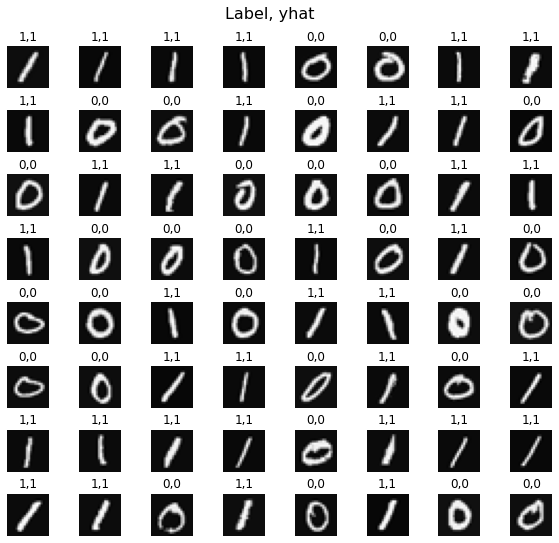

In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

<a name="2.5"></a>
### 2.5 NumPy Model Implementation (Forward Propagation in NumPy)

It is possible to build our own dense layer using NumPy. This can then be utilized to build a multi-layer neural network. 

<center> <img src="images/C2_W1_dense2.PNG" width="600" height="350"> </center>


<a name="numpy_seq_model"></a>

### Sequential Model Using Numpy

Below, we build a dense layer subroutine.

In [23]:
def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid)
    Returns
      a_out (ndarray (j,))  : j units
    """
    units = W.shape[1] # Extract number of neurons in this layer
    a_out = np.zeros(units) # Vector of activation used as inputs for the next layer
    
    for j in range(units):
        z = np.dot(a_in, W[:, j]) + b[j]
        a_out[j] = g(z)
    
    return(a_out)


In [24]:
# Quick Check
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[0.54735762 0.57932425 0.61063923]


The following cell builds a three-layer neural network utilizing the `my_dense` subroutine above.

In [26]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x,  W1, b1, sigmoid) # Layer 1 using training data as input
    a2 = my_dense(a1, W2, b2, sigmoid) # Layer 2 using layer 1's vector of activation values as input
    a3 = my_dense(a2, W3, b3, sigmoid) # Final output layer uses layer 2's vector of activation values as input
    return a3

We can copy trained weights and biases from Tensorflow.

In [27]:
W1_tmp, b1_tmp = layer1.get_weights()
W2_tmp, b2_tmp = layer2.get_weights()
W3_tmp, b3_tmp = layer3.get_weights()

In [33]:
# Make prediction for the first row of the training data, whose true label is 0
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
yhat = (prediction[0] >= 0.5).astype(int)
print( "yhat = ", yhat, " label= ", y[0,0])

yhat =  0  label=  0


In [35]:
# Make prediction for the last row of the training data, whose true label is 1
prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
yhat = (prediction[0] >= 0.5).astype(int)
print( "yhat = ", yhat, " label= ", y[500,0])

yhat =  1  label=  1


Run the following cell to see predictions from both the Numpy model and the Tensorflow model. This takes a moment to run.

1/1 [==============================] - 0s 17ms/step


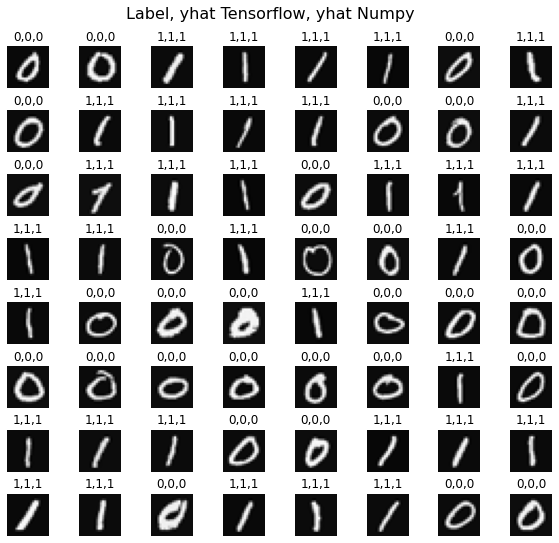

In [36]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_sequential(X[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(X[random_index].reshape(1,400))
    tf_yhat = int(tf_prediction >= 0.5)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{tf_yhat},{my_yhat}")
    ax.set_axis_off() 
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

<a name="2.6"></a>
### 2.6 Vectorized NumPy Model Implementation 

Below describes a layer operation that computes the output for all units in **one** layer on a given input example (one row of data):

<center><img src="images/C2_W1_VectorMatrix.PNG" width="700" height="400"></center>

We can demonstrate this using the examples `X` and the `W1`, `b1` parameters above. We use `np.matmul` to perform the matrix multiply. Note, the dimensions of x and W must be compatible as shown in the diagram above.

In [37]:
x = X[0].reshape(-1,1)         # Column vector (400,1)
z1 = np.matmul(x.T,W1) + b1    # (1,400)(400,25) = (1,25)
a1 = sigmoid(z1)
print(a1.shape)

(1, 25)


You can take this a step further and compute all the units for all examples in one Matrix-Matrix operation.

<center><img src="images/C2_W1_MatrixMatrix.PNG" width="700" height="400"></center>

The full operation is $\mathbf{Z}=\mathbf{XW}+\mathbf{b}$. This will utilize NumPy broadcasting to expand $\mathbf{b}$ to $m$ rows.

<a name="vectorized_model"></a>
### Vectorized Implementation

Below, compose a new `my_dense_v` subroutine that performs the layer calculations for a matrix of examples. This will utilize `np.matmul()`:

In [38]:
def my_dense_v(A_in, W, b, g):
    """
    Computes dense layer
    Args:
      A_in (ndarray (m,n)) : Data, m examples, n features each
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (1,j)) : bias vector, j units  
      g    activation function (e.g. sigmoid)
    Returns
      A_out (tf.Tensor or ndarray (m,j)) : m examples, j units
    """
    Z = np.matmul(A_in, W) + b
    A_out = g(Z)
    return A_out

All inputs to the function above must be 2-dimensional matrices:

In [39]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 training examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1, 3 features)
A_tst = my_dense_v(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]]


The following cell builds a three-layer neural network utilizing the `my_dense_v` subroutine above.

In [40]:
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_v(X,  W1, b1, sigmoid) # Layer 1 using training data as input
    A2 = my_dense_v(A1, W2, b2, sigmoid) # Layer 2 using layer 1's vector of activation values as input
    A3 = my_dense_v(A2, W3, b3, sigmoid) # Final output layer uses layer 2's vector of activation values as input
    return A3

We can again copy trained weights and biases from Tensorflow.

In [41]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

Let's make a prediction with the new model. This will make a prediction on *all of the examples at once*. Note the shape of the output.

In [50]:
Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Prediction.shape

(1000, 1)

We'll apply a threshold of 0.5 as before, but to all predictions at once.

In [48]:
Yhat

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [51]:
Yhat = (Prediction >= 0.5).astype(int)
# Again, predicting on the first and last training examples
print("predict a zero: ",Yhat[0], "predict a one: ", Yhat[500])

predict a zero:  [0] predict a one:  [1]


Run the following cell to see predictions. This will use the predictions we just calculated above. This takes a moment to run.

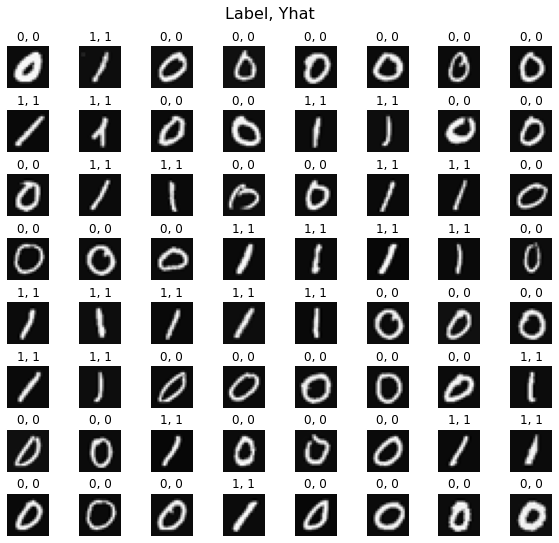

In [52]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
   
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off() 
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()

We can see what misclassified image looks like:

In [67]:
errors = np.where(y != Yhat)
errors

(array([142]), array([0]))

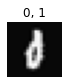

In [77]:
fig = plt.figure(figsize=(1, 1))
random_index = errors[0][0]
X_random_reshaped = X[random_index].reshape((20, 20)).T
plt.imshow(X_random_reshaped, cmap='gray')
# True label vs predicted label
plt.title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
plt.axis('off')
plt.show()

<a name="2.7"></a>
### 2.8 NumPy Broadcasting


In the last example,  $\mathbf{Z}=\mathbf{XW} + \mathbf{b}$ utilized NumPy broadcasting to expand the vector $\mathbf{b}$. 

* The term $\mathbf{XW}$  is a matrix-matrix operation with dimensions $(m,j_1)(j_1,j_2)$ which results in a matrix with dimension  $(m,j_2)$. 
  
* To that, we add a vector $\mathbf{b}$ with dimension $(1,j_2)$.
  
* Then, $\mathbf{b}$ must be expanded to be a $(m,j_2)$ matrix for this element-wise operation to make sense. This expansion is accomplished by NumPy broadcasting.

Broadcasting applies to element-wise operations. Its basic operation is to 'stretch' a smaller dimension by replicating elements to match a larger dimension.

More [specifically](https://NumPy.org/doc/stable/user/basics.broadcasting.html), when operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when

- they are equal, or
- one of them is 1   

If these conditions are not met, a `ValueError: operands could not be broadcast together` exception is thrown, indicating that the arrays have incompatible shapes. Here are some examples:

<figure>
    <center> <img src="./images/C2_W1_Assign1_BroadcastIndexes.PNG"  alt='missing' width="400"  ><center/>
    <figcaption>Calculating Broadcast Result shape</figcaption>
<figure/>

The graphic below describes expanding dimensions. Note the red text below:

<figure>
    <center> <img src="./images/C2_W1_Assign1_Broadcasting.gif"  alt='missing' width="600"  ><center/>
    <figcaption>Broadcast notionally expands arguments to match for element wise operations</figcaption>
<figure/>

The graphic above shows NumPy expanding the arguments to match before the final operation. Note that this is a notional description. The actual mechanics of NumPy operation choose the most efficient implementation.

In [78]:
a = np.array([1,2,3]).reshape(-1,1)  # (3,1)
b = 5
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

(a + b).shape: (3, 1), 
a + b = 
[[6]
 [7]
 [8]]


Note that this applies to all element-wise operations:

In [79]:
a = np.array([1,2,3]).reshape(-1,1)  # (3,1)
b = 5
print(f"(a * b).shape: {(a * b).shape}, \na * b = \n{a * b}")

(a * b).shape: (3, 1), 
a * b = 
[[ 5]
 [10]
 [15]]


<figure>
    <img src="./images/C2_W1_Assign1_VectorAdd.PNG"  alt='missing' width="740" >
    <center><figcaption><b>Row-Column Element-Wise Operations</b></figcaption></center>
<figure/>

In [80]:
a = np.array([1,2,3,4]).reshape(-1,1)
b = np.array([1,2,3]).reshape(1,-1)
print(a)
print(b)
print(f"(a + b).shape: {(a + b).shape}, \na + b = \n{a + b}")

[[1]
 [2]
 [3]
 [4]]
[[1 2 3]]
(a + b).shape: (4, 3), 
a + b = 
[[2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]]


This is the scenario in the dense layer we built above. Adding a 1-D vector $b$ to a (m,j) matrix.
<figure>
    <img src="./images/C2_W1_Assign1_BroadcastMatrix.PNG"  alt='missing' width="740" >
    <center><figcaption><b>Matrix + 1-D Vector</b></figcaption></center>
<figure/>